<a href="https://colab.research.google.com/github/kashaswal094/My-projects/blob/main/Cohort_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import csv data
df1=pd.read_csv("/content/Colonial Teacher File 17-19.csv")

In [ ]:
#get information about dataframe related to their type and counts
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TeacherID                  1780 non-null   int64  
 1   JobTitle                   1677 non-null   object 
 2   Grade                      637 non-null    object 
 3   Building                   1780 non-null   object 
 4   TotalYears                 1594 non-null   float64
 5   StateYears                 935 non-null    float64
 6   DistrictYears              1594 non-null   float64
 7   SchoolYears                0 non-null      float64
 8   AttendanceRate             1143 non-null   float64
 9   EffectivenessRating        1780 non-null   object 
 10  EffectivenessRatingAdjust  1522 non-null   float64
 11  FRLMath                    659 non-null    object 
 12  FRLELA                     659 non-null    object 
 13  FRLCombo                   659 non-null    objec

In [ ]:
#select required columns and save it as new data frame
data_17_19=df1[["TeacherID","Year"]]

In [ ]:
#rename the columns
data_17_19=data_17_19.rename(columns={'TeacherID':'Teacher ID'})

In [ ]:
#Read other csv file to get data for year 2021
df2=pd.read_csv("/content/Colonial Teacher File 21.csv")
df2

,Year,Teacher ID,Instructional Leader,Grades Taught,Subject,Building,School,Effectiveness,scaled ER,Race/Ethnicity,Years in District,Total Tenure,PBC?,ELA.Test.Prof,Math.Test.Prof
0,2021,38807,NaN,Elementary Teacher,Kindergarten Primary,427,Southern Elementary,3.6,0.90,Black,48.0,48.0,NaN,NaN,NaN
1,2021,39110,NaN,Elementary Teacher,Kindergarten Primary,410,Carrie Downie Elementary,3.0,0.75,Black,45.0,45.0,NaN,NaN,NaN
2,2021,32618,NaN,Secondary Teacher,Sec Technology Education,490,William Penn High,2.8,0.70,White,6.0,12.0,NaN,NaN,NaN
3,2021,29891,NaN,Elementary Teacher,Elem General,418,Pleasantville Elementary,3.4,0.85,White,36.0,36.0,NaN,NaN,NaN
4,2021,17594,NaN,Hearing & Speech Teacher,Speech & Hearing Therapist,418,Pleasantville Elementary,NaN,NaN,White,36.0,37.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,2021,FH,NaN,Secondary Teacher,Sec English,490,William Penn High,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
803,2021,PD,NaN,Secondary Teacher,Sec English,490,William Penn High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,2021,DP,NaN,Secondary Teacher,Sec English,490,William Penn High,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
805,2021,CH,NaN,Elementary Teacher,Elem General,410,Carrie Downie Elementary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_21=df2[["Teacher ID","Year"]]

In [ ]:
#Read data for year 2022
df3=pd.read_excel("/content/E3_Data Request_Completed DEC 2022_FINAL.xlsx",
                  sheet_name='Teacher Data_Final')

In [ ]:
data_22=df3[["Teacher ID","Year"]]

In [ ]:
#Merge dataframe
teacher_data_21_22= pd.merge(data_22, data_21,how='outer', on="Teacher ID")
teacher_data_21_22

,Teacher ID,Year_x,Year_y
0,38807,2020-2021,NaN
1,38807,2021-2022,NaN
2,39110,2020-2021,NaN
3,39110,2021-2022,NaN
4,32618,2020-2021,NaN
...,...,...,...
2460,194370,NaN,2021.0
2461,194871,NaN,2021.0
2462,98807,NaN,2021.0
2463,171564,NaN,2021.0


In [ ]:
# fill the null values of one column from the other column
teacher_data_21_22['Year_x'] = teacher_data_21_22['Year_x'].fillna(teacher_data_21_22.pop('Year_y'))
teacher_data_21_22

,Teacher ID,Year_x
0,38807,2020-2021
1,38807,2021-2022
2,39110,2020-2021
3,39110,2021-2022
4,32618,2020-2021
...,...,...
2460,194370,2021.0
2461,194871,2021.0
2462,98807,2021.0
2463,171564,2021.0


In [ ]:
#Rename the column value
teacher_data_21_22=teacher_data_21_22.rename(columns = {'Year_x':'Year'})

In [ ]:
teacher_data_21_22['Year'] = teacher_data_21_22['Year'].apply(lambda x: '2020-2021' if x == 2021.0 else x)
teacher_data_21_22

,Teacher ID,Year
0,38807,2020-2021
1,38807,2021-2022
2,39110,2020-2021
3,39110,2021-2022
4,32618,2020-2021
...,...,...
2460,194370,2020-2021
2461,194871,2020-2021
2462,98807,2020-2021
2463,171564,2020-2021


In [ ]:
# Append the data frame from year 17-19 to 21-22.
teacher_final_16_22 = pd.concat([data_17_19,teacher_data_21_22])
teacher_final_16_22

,Teacher ID,Year
0,12194,2018-19
1,12468,2018-19
2,13174,2018-19
3,13244,2018-19
4,14170,2018-19
...,...,...
2460,194370,2020-2021
2461,194871,2020-2021
2462,98807,2020-2021
2463,171564,2020-2021


In [ ]:
#List of unique values in year column
teacher_final_16_22['Year'].unique()

array(['2018-19', '2016-17', '2017-18', '2020-2021', '2021-2022'],
      dtype=object)

In [ ]:
# Split the value of year in start year and end year
teacher_final_16_22[['start year', 'end year']] = teacher_final_16_22.Year.str.split("-", expand = True)
teacher_final_16_22

,Teacher ID,Year,start year,end year
0,12194,2018-19,2018,19
1,12468,2018-19,2018,19
2,13174,2018-19,2018,19
3,13244,2018-19,2018,19
4,14170,2018-19,2018,19
...,...,...,...,...
2460,194370,2020-2021,2020,2021
2461,194871,2020-2021,2020,2021
2462,98807,2020-2021,2020,2021
2463,171564,2020-2021,2020,2021


In [ ]:
# Change start year from string to date time variable
from datetime import datetime
teacher_final_16_22['start year'] = teacher_final_16_22['start year'].apply(lambda x: datetime.strptime(x, '%Y'))
teacher_final_16_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4245 entries, 0 to 2464
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Teacher ID  4245 non-null   object        
 1   Year        4245 non-null   object        
 2   start year  4245 non-null   datetime64[ns]
 3   end year    4245 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 294.9+ KB


In [ ]:
teacher_final_16_22=teacher_final_16_22[['Teacher ID','Year','start year']]

In [ ]:
# Create a column to get the year when the teacher enrolled in the school

teacher_final_16_22['Cohort year'] =  teacher_final_16_22.groupby('Teacher ID')['start year'].transform('min')
teacher_final_16_22

,Teacher ID,Year,start year,Cohort year
0,12194,2018-19,2018-01-01,2017-01-01
1,12468,2018-19,2018-01-01,2016-01-01
2,13174,2018-19,2018-01-01,2016-01-01
3,13244,2018-19,2018-01-01,2016-01-01
4,14170,2018-19,2018-01-01,2016-01-01
...,...,...,...,...
2460,194370,2020-2021,2020-01-01,2020-01-01
2461,194871,2020-2021,2020-01-01,2020-01-01
2462,98807,2020-2021,2020-01-01,2020-01-01
2463,171564,2020-2021,2020-01-01,2020-01-01


In [ ]:
# create a date element function to get a series for subtraction

def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [ ]:
# get date elements for our cohort and invoice columns

_,joining_month,joining_year =  get_date_elements(teacher_final_16_22,'start year')
_,Cohort_month,Cohort_year =  get_date_elements(teacher_final_16_22,'Cohort year')

In [ ]:
# Create a cohort index which shows for how long teacher is in that school

year_diff=joining_year-Cohort_year
teacher_final_16_22['CohortIndex'] = year_diff+1
teacher_final_16_22

,Teacher ID,Year,start year,Cohort year,CohortIndex
0,12194,2018-19,2018-01-01,2017-01-01,2
1,12468,2018-19,2018-01-01,2016-01-01,3
2,13174,2018-19,2018-01-01,2016-01-01,3
3,13244,2018-19,2018-01-01,2016-01-01,3
4,14170,2018-19,2018-01-01,2016-01-01,3
...,...,...,...,...,...
2460,194370,2020-2021,2020-01-01,2020-01-01,1
2461,194871,2020-2021,2020-01-01,2020-01-01,1
2462,98807,2020-2021,2020-01-01,2020-01-01,1
2463,171564,2020-2021,2020-01-01,2020-01-01,1


In [ ]:
#count the teacher ID by grouping by Cohort year and Cohort Index

cohort_data = teacher_final_16_22.groupby(['Cohort year','CohortIndex'])['Teacher ID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort year,CohortIndex,Teacher ID
0,2016-01-01,1,484
1,2016-01-01,2,355
2,2016-01-01,3,358
3,2016-01-01,5,298
4,2016-01-01,6,298
5,2017-01-01,1,282
6,2017-01-01,2,158
7,2017-01-01,4,189
8,2017-01-01,5,191
9,2018-01-01,1,143


In [ ]:
# create a pivot table

cohort_table = cohort_data.pivot(index='Cohort year', columns=['CohortIndex'],values='Teacher ID')
cohort_table

CohortIndex,1,2,3,4,5,6
Cohort year,,,,,,
2016-01-01,484.0,355.0,358.0,NaN,298.0,298.0
2017-01-01,282.0,158.0,NaN,189.0,191.0,NaN
2018-01-01,143.0,NaN,97.0,99.0,NaN,NaN
2020-01-01,1024.0,216.0,NaN,NaN,NaN,NaN
2021-01-01,53.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size=cohort_table.iloc[:,0]
new_cohort_table = cohort_table.divide(cohort_size,axis=0)
new_cohort_table.round(3)*100

CohortIndex,1,2,3,4,5,6
Cohort year,,,,,,
2016-01-01,100.0,73.3,74.0,NaN,61.6,61.6
2017-01-01,100.0,56.0,NaN,67.0,67.7,NaN
2018-01-01,100.0,NaN,67.8,69.2,NaN,NaN
2020-01-01,100.0,21.1,NaN,NaN,NaN,NaN
2021-01-01,100.0,NaN,NaN,NaN,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, '2016-17'),
  Text(0, 1.5, '2017-18'),
  Text(0, 2.5, '2018-19'),
  Text(0, 3.5, '2020-21'),
  Text(0, 4.5, '2021-22')])

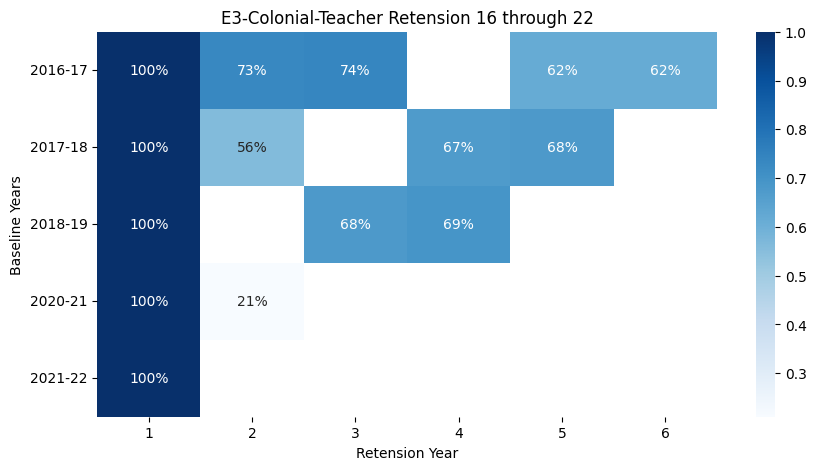

In [ ]:
# change y ticks labels
y_labels = ('2016-17','2017-18','2018-19','2020-21','2021-22')

#visualize our results in heatmap
plt.figure(figsize=(10,5))
sns.heatmap(new_cohort_table,annot=True,yticklabels=y_labels, cmap='Blues',fmt='.0%')

# label tittle, x-axis snd y-axis
plt.title("E3-Colonial-Teacher Retension 16 through 22")
plt.xlabel("Retension Year")
plt.ylabel("Baseline Years")
plt.yticks(rotation=0)